Setting up the camera, important code, settings

In [2]:
from pypylon import pylon
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import random
import math
import scipy

In [ ]:
# Accessing camera using USB
camera = pylon.InstantCamera(pylon.TlFactory.GetInstance().CreateFirstDevice())
camera.Open()

# Saving image to variable
numberOfImagesToGrab = 1
camera.StartGrabbingMax(numberOfImagesToGrab)

while camera.IsGrabbing():
    grabResult = camera.RetrieveResult(5000, pylon.TimeoutHandling_ThrowException)

    if grabResult.GrabSucceeded():
        imgName = grabResult.Array
    grabResult.Release()

camera.Close()

np.savez("fileName", var = imgName, var2 = imgName2)

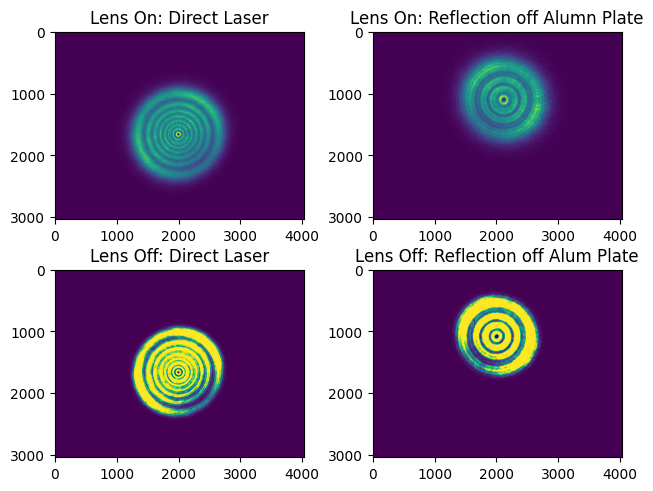

In [3]:
# Finding best camera settings (lens cover and focus)

data = np.load("sample.npz")

figure, axes = plt.subplots(2,2)
axes[0][0].imshow(data["pureLens"])
axes[0][0].set_title("Lens On: Direct Laser")

axes[0][1].imshow(data["alumLens"])
axes[0][1].set_title("Lens On: Reflection off Alumn Plate")

axes[1][0].imshow(data["pureNo"])
axes[1][0].set_title("Lens Off: Direct Laser")

axes[1][1].imshow(data["alumNo"])
axes[1][1].set_title("Lens Off: Reflection off Alum Plate")

figure.tight_layout(pad=0.3)

half-point width: 574
half-point width: 962
half-point width: 913
half-point width: 1221


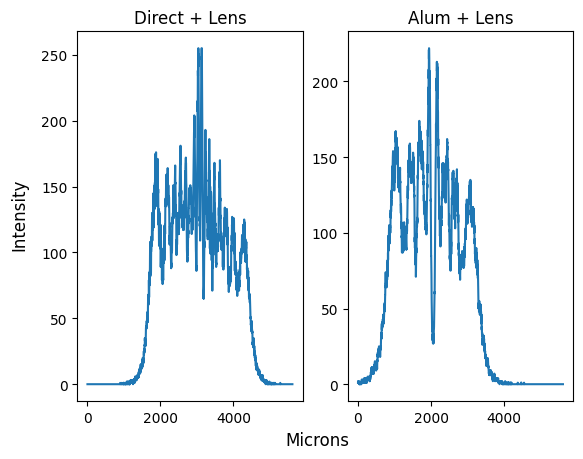

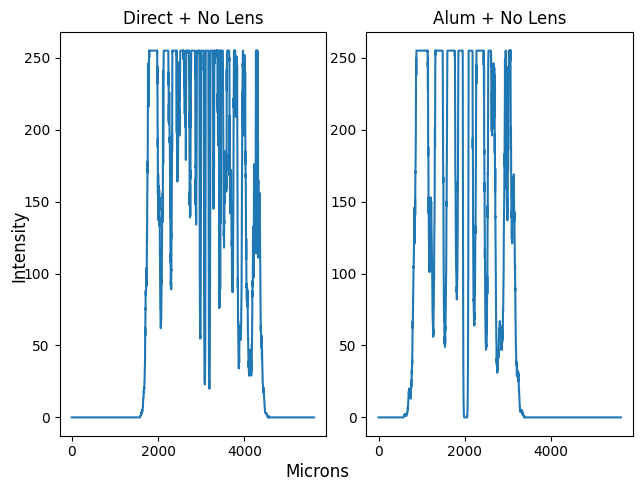

In [4]:
# Finding best camera settings (exposure values)

data = np.load("sample.npz")

pLens = data["pureLens"][:, 1975:1976]
aLens = data["alumLens"][:, 2100:2101]
pNoLens = data["pureNo"][:, 1980:1981]
aNoLens = data["alumNo"][:, 1990:1991]

# with lens

figure1, axes = plt.subplots(1,2)
figure1.supxlabel("Microns")
figure1.supylabel("Intensity")

x = [i*1.85 for i in range(len(pLens))]

axes[0].plot(x, pLens)
axes[0].set_title("Direct + Lens")
axes[1].plot(x, aLens)
axes[1].set_title("Alum + Lens")

figure.tight_layout(pad=0.3)

# no lens

figure2, axes2 = plt.subplots(1,2)
figure2.supxlabel("Microns")
figure2.supylabel("Intensity")

x = [i*1.85 for i in range(len(pLens))]

axes2[0].plot(x, pNoLens)
axes2[0].set_title("Direct + No Lens")
axes2[1].plot(x, aNoLens)
axes2[1].set_title("Alum + No Lens")

figure2.tight_layout(pad=0.3)

imgArr = [pLens, aLens, pNoLens, aNoLens]

for i in range(4):
    halfMax = imgArr[i].max()/2
    halfLength = round(len(imgArr[i])/2)

    firstArr = imgArr[i][:halfLength]
    firstDiff = np.absolute(firstArr - halfMax)
    firstIndex = firstDiff.argmin()

    secArr = imgArr[i][halfLength:]
    secDiff = np.absolute(secArr - halfMax)
    secIndex = secDiff.argmin()

    print("half-point width: " + str(secIndex+halfLength - firstIndex))

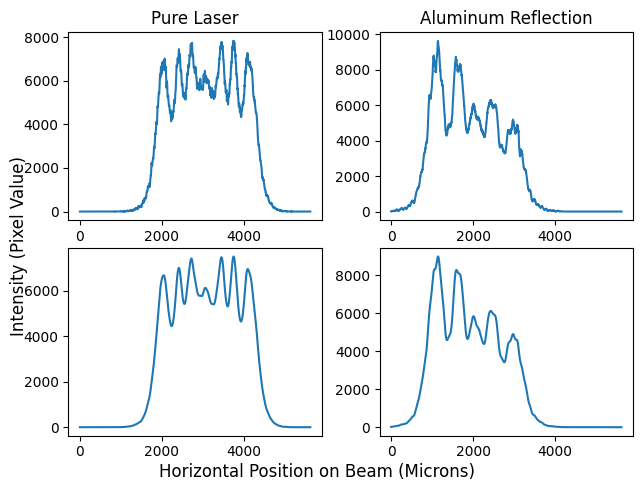

In [7]:
# PRACTICE: Compressing Images to 1D array 

data=np.load("sample.npz")

pure = data["pureLens"]
alum = data["alumLens"]

pSlice = pure[:, 1645:1695]
aSlice = alum[:, 1855:1905]

pArr = []
aArr = []
for a in range(len(pSlice)):
    pSum = 0
    aSum = 0
    for b in range(len(pSlice[0])):
        pSum+=pSlice[a][b]
        aSum+=aSlice[a][b]
    pArr.append(pSum)
    aArr.append(aSum)

x = [i*1.85 for i in range(len(pArr))]

figure, axes = plt.subplots(2,2)
figure.supxlabel("Horizontal Position on Beam (Microns)")
figure.supylabel("Intensity (Pixel Value)")

axes[0][0].plot(x, pArr)
axes[0][0].set_title("Pure Laser")
axes[0][1].plot(x, aArr)
axes[0][1].set_title("Aluminum Reflection")

axes[1][0].plot(x, scipy.ndimage.gaussian_filter(pArr, 15))
axes[1][1].plot(x, scipy.ndimage.gaussian_filter(aArr, 15))

figure.tight_layout(pad=0.3)

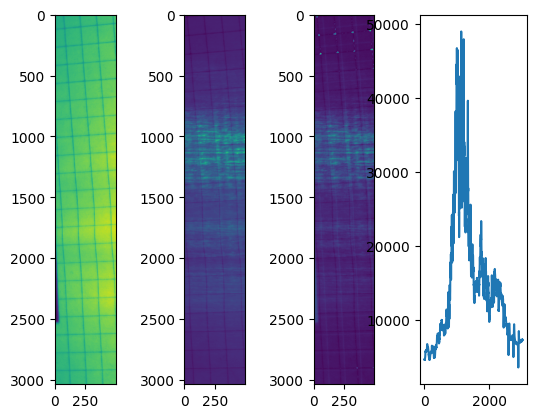

In [10]:
# PRACTICE: Removing Noise

figure, ax = plt.subplots(1, 4)
data = np.load("8inch.npz")
img = data["img8_240"]

noiseD = img[:, 0:500]
spotD = img[:, 1000:1500]

ax[0].imshow(noiseD)
ax[1].imshow(spotD)

ax[2].imshow(spotD - noiseD)

finalArr = []
for a in range(len(noiseD)):
    noiseSum = 0
    spotSum = 0
    for b in range(len(noiseD[0])):
        noiseSum+=noiseD[a][b]
        spotSum+=spotD[a][b]
    finalArr.append(spotSum-noiseSum)

ax[3].plot(finalArr)